<a href="https://colab.research.google.com/github/a-cuc/CPE313/blob/main/Prelim/HOA%201.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<u>**Hands-on Activity 1.2** | **Training Neural Networks**
**Name** | Cu, Angelo Luis C.
**Section** | CPE32S3
**Date Performed**: | 2/1/2025
**Date Submitted**: | 2/1/2025
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
275,2,100,70,52,57,40.5,0.677,25,0
311,0,106,70,37,148,39.4,0.605,22,0
110,3,171,72,33,135,33.3,0.199,24,1
574,1,143,86,30,330,30.1,0.892,23,0
634,10,92,62,0,0,25.9,0.167,31,0


In [ ]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5796 - loss: 0.7310 - val_accuracy: 0.5573 - val_loss: 0.7463
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6019 - loss: 0.7068 - val_accuracy: 0.5677 - val_loss: 0.7395
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5884 - loss: 0.7278 - val_accuracy: 0.5677 - val_loss: 0.7329
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6329 - loss: 0.7048 - val_accuracy: 0.5833 - val_loss: 0.7267
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6143 - loss: 0.7027 - val_accuracy: 0.5938 - val_loss: 0.7207
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6041 - loss: 0.7018 - val_accuracy: 0.5938 - val_loss: 0.7149
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6185 - loss: 0.6990 - val_accuracy: 0.5990 - val_loss: 0.7093
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6569 - loss: 0.6670 - val_accuracy: 0.5

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.5708376 ],
       [0.6909781 ],
       [0.40493524],
       [0.44093722],
       [0.18368457],
       [0.48704988],
       [0.07144447],
       [0.45125666],
       [0.79984576],
       [0.1754082 ]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.745
roc-auc is 0.803


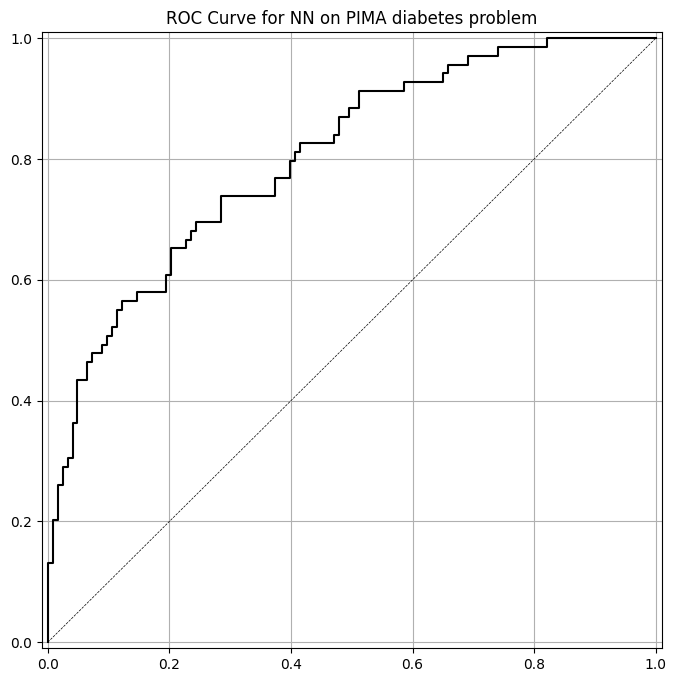

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

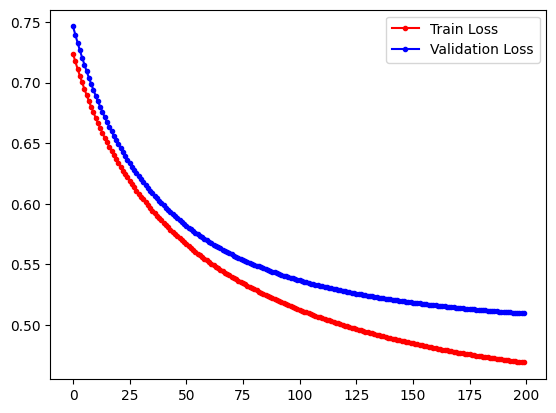

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

<font color='blue'> The training and validation losses suggest that the optimal number of epoch is around 50 as this show the highest decrease in losses (from around 0.8 to 0.55). The plot also shows that the validation loss is always higher compared to the training loss.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# Creation of model
supp_model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
supp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Running the model
supp_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = supp_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3790 - loss: 0.8024 - val_accuracy: 0.4010 - val_loss: 0.7976
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3910 - loss: 0.7908 - val_accuracy: 0.4219 - val_loss: 0.7820
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3743 - loss: 0.8171 - val_accuracy: 0.4219 - val_loss: 0.7680
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4124 - loss: 0.7957 - val_accuracy: 0.4219 - val_loss: 0.7555
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 0.7503 - val_accuracy: 0.4323 - val_loss: 0.7442
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4142 - loss: 0.7796 - val_accuracy: 0.4323 - val_loss: 0.7340
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4409 - loss: 0.7627 - val_accuracy: 0.4479 - val_loss: 0.7248
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4618 - loss: 0.7368 - val_accuracy: 0

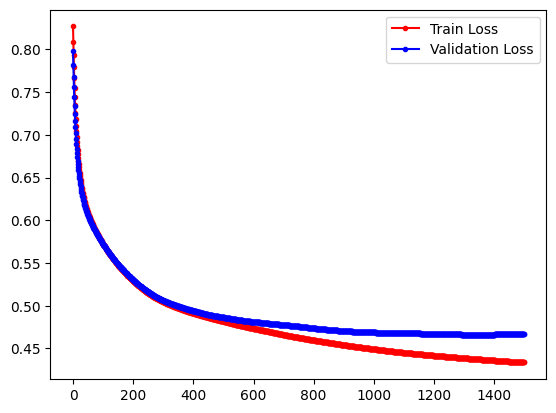

In [ ]:
# Plotting the training and validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# The plot suggests that the optimal epoch is around 300, as it represents
# the highest decrease in loss (from 0.8 to 0.5).
# Comparing this to the model in the exercise,
# it took more epochs to reach a similar training and validation loss.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
accuracy is 0.771
roc-auc is 0.840


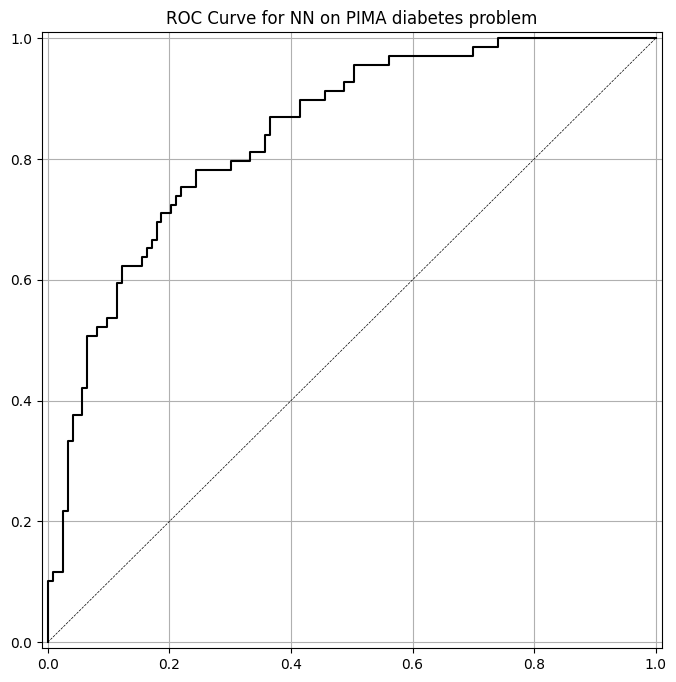

In [ ]:
# Plotting the ROC Curve and getting the AUC Score
y_pred_prob_nn_2 = supp_model.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype(int)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

# Comparing this ROC Curve and the AUC Score with the previous model,
# it shows a steeper increase in the score and the overall scores were higher

In [ ]:
# Use different learning rates, epochs, and network structures
# Creation of a 2 layer, 8 nodes with tanh activation function neural network
supp_model_2  = Sequential([
    Dense(8, input_shape=(8,), activation="tanh"),
    Dense(8, input_shape=(8,), activation="tanh"),
    Dense(1, activation="sigmoid")
])
supp_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model with a .001 learning rate and 500 epochs
supp_model_2.compile(SGD(learning_rate = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = supp_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7395 - loss: 0.5077 - val_accuracy: 0.7917 - val_loss: 0.4943
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7938 - loss: 0.4487 - val_accuracy: 0.7917 - val_loss: 0.4942
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7447 - loss: 0.4969 - val_accuracy: 0.7917 - val_loss: 0.4941
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7525 - loss: 0.4917 - val_accuracy: 0.7917 - val_loss: 0.4940
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7664 - loss: 0.4671 - val_accuracy: 0.7917 - val_loss: 0.4940
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7564 - loss: 0.4880 - val_accuracy: 0.7917 - val_loss: 0.4939
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7680 - loss: 0.4797 - val_accuracy: 0.7917 - val_loss: 0.4938
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7744 - loss: 0.4647 - val_accuracy: 0.7

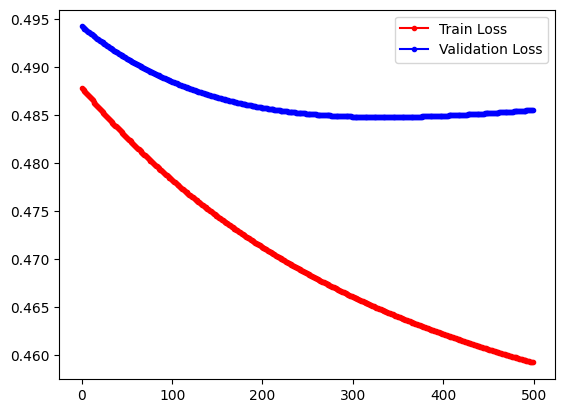

In [ ]:
# Plotting the training and validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# The plot suggests that compared to the previous models,
# it achieved a lower loss even at the first runs, but is more prone to overfitting
# as such, the optimal epochs is at around 100 where it begins to have a higher gap

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
accuracy is 0.755
roc-auc is 0.828


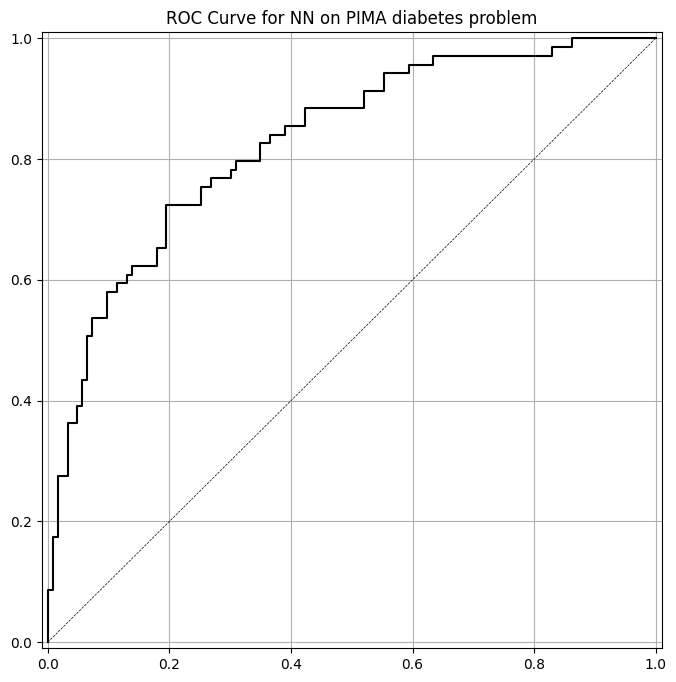

In [ ]:
# Plotting the ROC Curve and getting the AUC Score
y_pred_prob_nn_3 = supp_model_2.predict(X_test_norm)
y_pred_class_nn_3 = (y_pred_prob_nn_3 > 0.5).astype(int)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'NN')

# Comparing this ROC Curve and the AUC Score with the previous models,
# the score is between the first (exercise) model and the second (supplementary) model

#### Conclusion

In conclusion, I have learned that it is important to understand the syntax and the different parameters available in creating and training neural networks for us to make a model which is accurate in classification problems. It is also crucial to use different evaluation metrics to know the performance of the model. Overall, for the Indians Diabetes dataset, the best model is the second trained model in the supplementary activity, with 2 layers containing 8 nodes each using a tanh activation function with .001 learning rate and 500 epochs, as it is able to reach a higher initial accuracy. Even if the first trained model in the supplementary activity was able to achieve higher accuracy and ROC-AUC score, it was ran longer with more epochs, making the second model more efficient overall.